# 3 Dominio Espacial

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def show_image(image, title=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

In [2]:
def filtro_gris(img, mask, uint8=True):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h1, w1 = img.shape
    h2, w2 = mask.shape
    
    g = np.zeros_like(img, dtype=np.float32)
    for y in range(w1):
        for x in range(h1):
            valor = 0
            s = -h2 // 2
            for j in range(w2):
                t = -w2 // 2
                for i in range(h2):
                    if 0 <= y+t < w1 and 0 <= x+s < h1:
                        valor += mask[i, j] * img[x+s, y+t]
                    t += 1
                s += 1
            g[x, y] = valor
    if uint8:
        return np.clip(g, 0, 255).astype(np.uint8)
    else:
        return np.clip(g, 0, 255)

In [3]:
def filtro_color(img, mask):
    h1, w1, ch = img.shape
    h2, w2 = mask.shape
    
    g = np.zeros_like(img, dtype=np.float32)
    for c in range(ch):  # Procesar cada canal por separado
        for y in range(w1):
            for x in range(h1):
                valor = 0
                s = -h2 // 2
                for j in range(w2):
                    t = -w2 // 2
                    for i in range(h2):
                        if 0 <= y+t < w1 and 0 <= x+s < h1:
                            valor += mask[i, j] * img[x+s, y+t, c]
                        t += 1
                    s += 1
                g[x, y, c] = valor
    return np.clip(g, 0, 255).astype(np.uint8)

**1. Filtro de Media: Implementar un filtro de media en una imagen usando convoluci´on con un kernel
de promediado.**

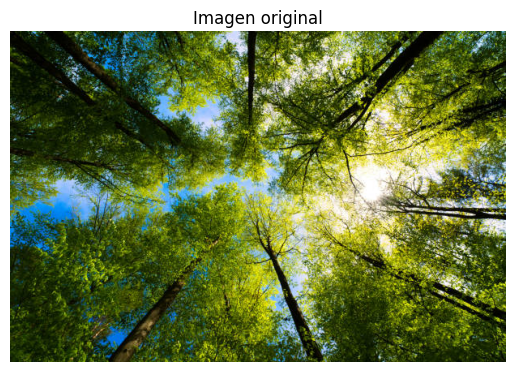

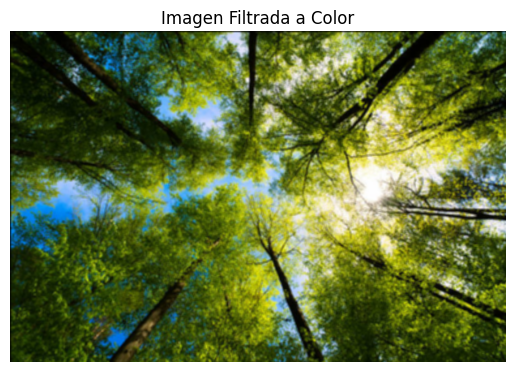

In [4]:
img = cv2.imread('bosque.jpg')
mask = np.ones((3, 3), dtype=np.float32) / 9
filtered = filtro_color(img, mask)

show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada a Color")



**2. Filtro de Mediana: Aplicar un filtro de mediana para reducir el ruido en una imagen.**

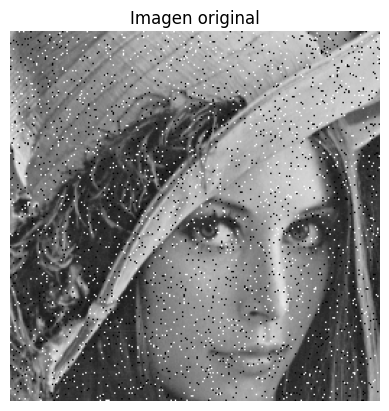

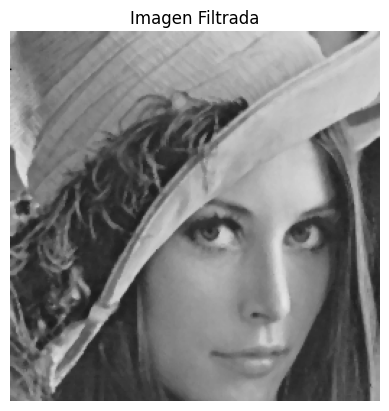

In [5]:
def filtro_mediana(img, size=(3,3)):
    h1, w1, ch = img.shape
    h2,w2 = size
    if h2 % 2 == 0 or w2 % 2 == 0:
        raise ValueError("El tamaño del filtro debe ser impar.")
    
    if h2 > h1 or w2 > w1:
        raise ValueError("El tamaño del filtro no puede ser mayor que la imagen.")
    
    g = np.zeros_like(img, dtype=np.float32)
    for y in range(w1):
        for x in range(h1):
            valores = []
            s = -h2 // 2
            for j in range(w2):
                t = -w2 // 2
                for i in range(h2):
                    if 0 <= y+t < w1 and 0 <= x+s < h1:
                        valores.append(img[x+s, y+t])
                    t += 1
                s += 1
            valor = np.median(valores)
            g[x, y] = valor
    return np.clip(g, 0, 255).astype(np.uint8)

img = cv2.imread('salt_peper.png')
filtered = filtro_mediana(img)
show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada")

**3. Filtro Gaussiano: Aplicar un filtro gaussiano para suavizar una imagen y analizar su efecto en los
bordes.**  

Se observan los bordes más difuminados, se pierden los detalles finos de la imagen.

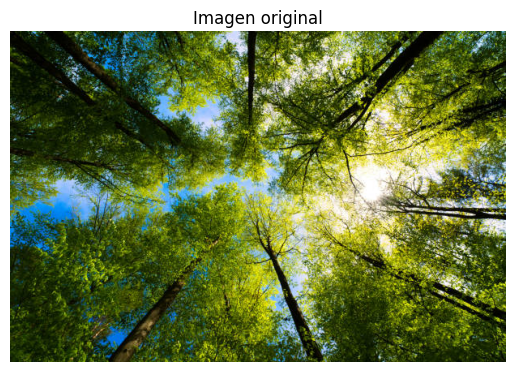

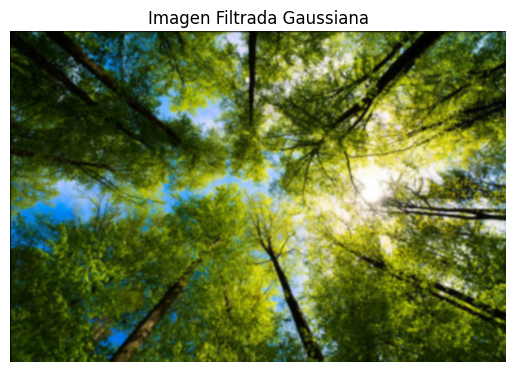

In [6]:
def kernel_gaussiano(size, sigma):
    k = size // 2
    x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)  # Normalizamos para que sume 1
    return kernel

def filtro_gaussiano(img, size=3, sigma=1):
    h1, w1 = img.shape
    h2 = size
    w2 = size
    mask = kernel_gaussiano(size, sigma)
    if h2 % 2 == 0 or w2 % 2 == 0:
        raise ValueError("El tamaño del filtro debe ser impar.")
    
    if h2 > h1 or w2 > w1:
        raise ValueError("El tamaño del filtro no puede ser mayor que la imagen.")
    
    g = np.zeros_like(img, dtype=np.float32)
    for y in range(w1):
        for x in range(h1):
            valor = 0
            s = -h2 // 2
            for j in range(w2):
                t = -w2 // 2
                for i in range(h2):
                    if 0 <= y+t < w1 and 0 <= x+s < h1:
                        valor += mask[i,j] * img[x+s, y+t]
                    t += 1
                s += 1
            g[x, y] = valor
    return np.clip(g, 0, 255).astype(np.uint8)

img = cv2.imread('bosque.jpg')
mask = kernel_gaussiano(5, 1)
filtered = filtro_color(img, mask)
show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada Gaussiana")

**4. Filtro Laplaciano: Aplicar el operador de Laplace para detectar bordes en una imagen en escala de
grises.**

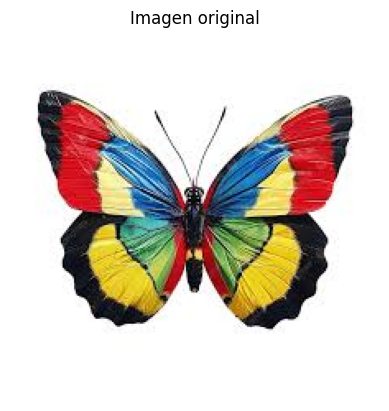

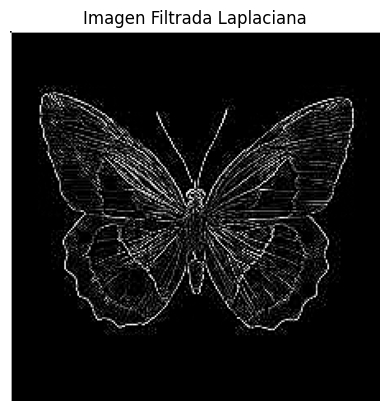

In [ ]:
img = cv2.imread('mariposa.jpg')
#laplaciano
mask = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]], dtype=np.float32)
filtered = filtro_gris(img, mask)
show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada Laplaciana")

**5. Filtro de Sobel: Calcular el gradiente de una imagen usando los filtros de Sobel en las direcciones X
e Y.**

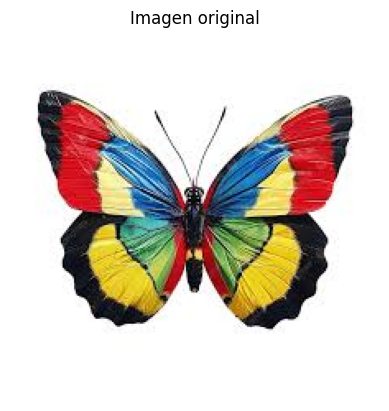

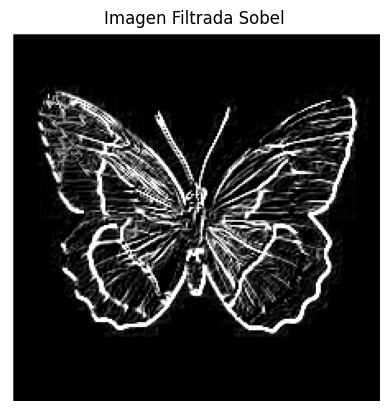

In [ ]:
img = cv2.imread('mariposa.jpg')
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
filtered_x = filtro_gris(img, sobel_x, uint8=False)
filtered_y = filtro_gris(img, sobel_y, uint8=False)
filtered = np.sqrt(filtered_x**2 + filtered_y**2)
filtered = np.clip(filtered, 0, 255).astype(np.uint8)
show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada Sobel")

**6. Filtro de Scharr: Comparar el resultado del filtro de Sobel con el filtro de Scharr.**

**7. Filtro de Prewitt: Aplicar el operador de Prewitt y comparar con Sobel.**

**8. Suavizado y Sobel (*): Aplicar un filtro gaussiano antes del operador de Sobel y analizar las diferencias
en la detecci´on de bordes.**  

Ahora el filtro Sobel muestra los bordes de forma menos nítida, perdiendo algunos detalles de bordes más finos o reflejos en la imagen.

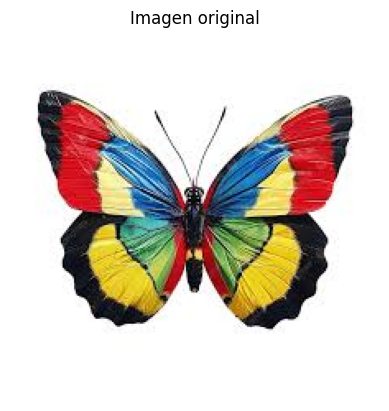

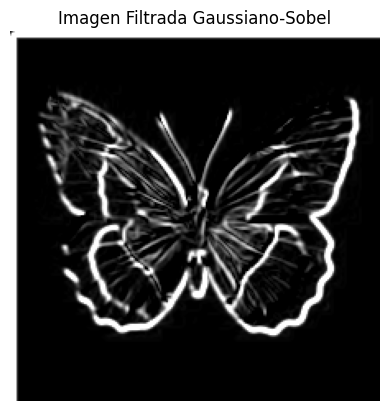

In [14]:
img = cv2.imread('mariposa.jpg')

#filtro gaussiano
mask = kernel_gaussiano(5, 1)
gaussiano = filtro_color(img, mask)

# filtro sobel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
filtered_x = filtro_gris(gaussiano, sobel_x, uint8=False)
filtered_y = filtro_gris(gaussiano, sobel_y, uint8=False)
filtered = np.sqrt(filtered_x**2 + filtered_y**2)
filtered = np.clip(filtered, 0, 255).astype(np.uint8)


show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada Gaussiano-Sobel")

**9. Filtro Laplaciano del Gaussiano (LoG): Aplicar un filtro gaussiano seguido de un operador de Laplace
para detectar bordes.**

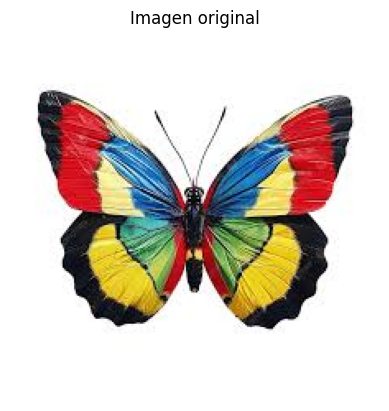

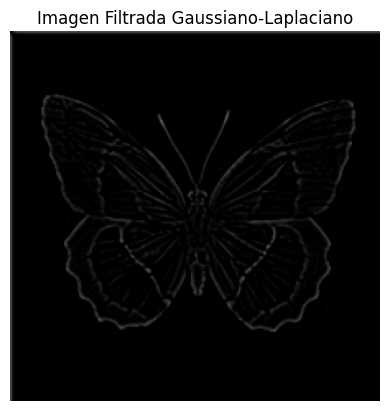

In [15]:
img = cv2.imread('mariposa.jpg')

#filtro gaussiano
mask = kernel_gaussiano(5, 1)
gaussiano = filtro_color(img, mask)

#laplaciano
mask = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]], dtype=np.float32)
filtered = filtro_gris(gaussiano, mask)

show_image(img, "Imagen original")
show_image(filtered, "Imagen Filtrada Gaussiano-Laplaciano")


**10. Filtro de Paso Alto Personalizado: Implementar un filtro de realce de bordes con una matriz de
convoluci´on personalizada.**

**11. Filtro Canny: Aplicar el detector de bordes de Canny y ajustar los umbrales para obtener diferentes
resultados.**

**12. (*) Comparaci´on de M´etodos de Detecci´on de Bordes : Comparar Sobel, Prewitt, Laplace y Canny trabajando diversas im´agenes con caracter´ısticas diferentes.**

**13. (*) Realce de Detalles: Aplicar un filtro de paso alto y sumarlo a la imagen original para mejorar los
detalles.**

**14. Reducci´on de Ruido con Bilateral Filter: Aplicar un filtro bilateral para suavizar la imagen sin perder
detalles importantes.**

**15. (*) Filtro de Diferencia Gaussiana (DoG): Aplicar la t´ecnica de Diferencia de Gaussiana para resaltar
bordes.**